In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons in a layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
#10 is a number of classifications, and soft probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3) #3 epochs means it passed over your data set 3 times.

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2632 - accuracy: 0.9234
Epoch 2/3
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1067 - accuracy: 0.9676
Epoch 3/3
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0728 - accuracy: 0.9769


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0917 - accuracy: 0.9703
0.09165728666912765 0.9703


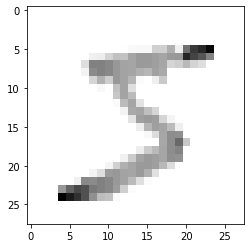

In [8]:
import matplotlib.pyplot as plt
#print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary);


In [9]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [10]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [11]:
predictions = new_model.predict(x_test)

In [23]:
print(predictions)
predictions.shape

[[5.9217160e-09 4.5009391e-10 7.6368383e-07 ... 9.9999201e-01
  3.7584166e-10 6.5300632e-08]
 [1.0001269e-09 6.6227093e-04 9.9909043e-01 ... 2.9863285e-09
  2.6015843e-07 1.8787383e-10]
 [1.6034214e-07 9.9975115e-01 2.6597085e-05 ... 9.7883421e-05
  7.6358294e-05 3.8928354e-07]
 ...
 [3.8265986e-09 1.3052104e-07 5.7321714e-08 ... 5.4421048e-06
  4.2040738e-06 3.0963827e-04]
 [1.7389053e-05 4.0867394e-06 2.3568484e-07 ... 9.5773510e-07
  8.7780301e-03 7.9285223e-07]
 [1.0925162e-05 1.0145337e-08 6.7420228e-07 ... 5.2840904e-10
  2.8896279e-06 2.6091051e-08]]


(10000, 10)

In [21]:
import numpy as np

print(np.argmax(predictions[45]))

5


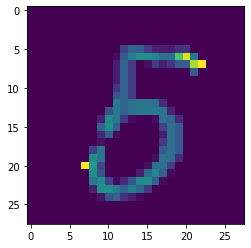

In [22]:
plt.imshow(x_test[45])
plt.show()